In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
print("Model Training and Inference")

Model Training and Inference


In [1]:
!pip install ultralytics

  Obtaining dependency information for ultralytics from https://files.pythonhosted.org/packages/f4/79/b192c64e13eefc7f8543a10080767ab057850fa9bdbc38e7c261a3432c93/ultralytics-8.0.227-py3-none-any.whl.metadata
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 660.5/660.5 kB 15.4 MB/s eta 0:00:0000:01


In [3]:
with open('/kaggle/working/data.yaml', 'w') as file:
    file.write('This is the content of the file.')


In [4]:
import yaml

# Define the dataset paths
train_path = '/kaggle/input/aerialimagesoftrees/Dataset/train'
test_path = '/kaggle/input/aerialimagesoftrees/Dataset/test'
val_path = '/kaggle/input/aerialimagesoftrees/Dataset/valid'

# Define the number of classes and class names
num_classes = 1
class_names = ['Tree']

# Create a dictionary with the dataset paths, number of classes, and class names
dataset_info = {
    'train': train_path,
    'test': test_path,
    'val': val_path,
    'nc': num_classes,
    'names': class_names
}

# Create a YAML file and write the dataset information
with open('/kaggle/working/data.yaml', 'w') as file:
    yaml.dump(dataset_info, file, default_flow_style=False)


In [5]:
from ultralytics import YOLO
 
# Load the model.
model = YOLO('yolov8n.pt')
 
# Training.
results = model.train(
   data='data.yaml',
   imgsz=640,
   epochs=10,
   batch=8,
   name='yolov8n_custom'
)

100%|██████████| 6.23M/6.23M [00:00<00:00, 98.8MB/s]


Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=data.yaml, epochs=10, patience=50, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=yolov8n_custom, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscri

100%|██████████| 755k/755k [00:00<00:00, 27.3MB/s]
2023-12-17 09:53:35,189	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
2023-12-17 09:53:36,178	INFO util.py:129 -- Outdated packages:
  ipywidgets==7.7.1 found, needs ipywidgets>=8
Run `pip install -U ipywidgets`, then restart the notebook server for rich notebook output.
/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize
wandb: Paste an API key from your profile and hit enter, or press ctrl+c to quit:

  ········································


wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks with YOLOv8n...
AMP: checks passed ✅


train: Scanning /kaggle/input/aerialimagesoftrees/Dataset/train/labels... 2528 images, 547 backgrounds, 0 corrupt: 100%|██████████| 2528/2528 [00:09<00:00, 262.12it/s]

train: WARNING ⚠️ /kaggle/input/aerialimagesoftrees/Dataset/train/images/83688f0d-5848-48fc-8284-692532aec0ec_jpg.rf.cd4b738408e536b713e5d33749fb4cf8.jpg: 2 duplicate labels removed


train: WARNING ⚠️ Cache directory /kaggle/input/aerialimagesoftrees/Dataset/train is not writeable, cache not saved.
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /kaggle/input/aerialimagesoftrees/Dataset/valid/labels... 495 images, 1 backgrounds, 0 corrupt: 100%|██████████| 495/495 [00:01<00:00, 288.40it/s]

val: WARNING ⚠️ Cache directory /kaggle/input/aerialimagesoftrees/Dataset/valid is not writeable, cache not saved.


Plotting labels to runs/detect/yolov8n_custom/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/yolov8n_custom
Starting training for 10 epochs...
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10      2.11G      1.795      1.747      1.529        416        640: 100%|██████████| 316/316 [01:06<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:07<00:00,  4.20it/s]

                   all        495      28144      0.703      0.723      0.751      0.395



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10      2.79G      1.594      1.264      1.374        355        640: 100%|██████████| 316/316 [00:57<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.20it/s]


                   all        495      28144      0.744       0.72       0.78       0.42

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10      2.64G      1.561      1.186      1.353        566        640: 100%|██████████| 316/316 [00:58<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.19it/s]


                   all        495      28144      0.777      0.768      0.832      0.485

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10      1.78G      1.526      1.122      1.337        427        640: 100%|██████████| 316/316 [00:57<00:00,  5.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.21it/s]


                   all        495      28144      0.783      0.778      0.843      0.494

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         2G      1.513       1.08      1.319        450        640: 100%|██████████| 316/316 [00:58<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.43it/s]

                   all        495      28144      0.786       0.79       0.85      0.499



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10       2.4G      1.483      1.032      1.305        113        640: 100%|██████████| 316/316 [00:58<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.65it/s]


                   all        495      28144      0.803      0.798      0.866      0.516

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10      1.87G      1.454     0.9911      1.287        499        640: 100%|██████████| 316/316 [00:58<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.49it/s]


                   all        495      28144      0.795      0.807      0.866      0.519

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10      2.48G       1.44       0.97      1.282        420        640: 100%|██████████| 316/316 [00:58<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  5.73it/s]


                   all        495      28144      0.819      0.804      0.877      0.536

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10      2.54G      1.416      0.919      1.256        490        640: 100%|██████████| 316/316 [00:58<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  6.01it/s]


                   all        495      28144      0.807      0.806      0.873      0.538

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10      2.38G      1.402     0.8979      1.253        372        640: 100%|██████████| 316/316 [00:58<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:05<00:00,  6.05it/s]


                   all        495      28144      0.816      0.821      0.885      0.552

10 epochs completed in 0.186 hours.
Optimizer stripped from runs/detect/yolov8n_custom/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/yolov8n_custom/weights/best.pt, 6.2MB

Validating runs/detect/yolov8n_custom/weights/best.pt...
Ultralytics YOLOv8.0.227 🚀 Python-3.10.12 torch-2.0.0 CUDA:0 (Tesla P100-PCIE-16GB, 16281MiB)
Model summary (fused): 168 layers, 3005843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95):   6%|▋         | 2/31 [00:00<00:04,  6.14it/s]

WARNING ⚠️ NMS time limit 1.300s exceeded


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 31/31 [00:17<00:00,  1.72it/s]


                   all        495      28144      0.815      0.799      0.864      0.539
Speed: 0.6ms preprocess, 3.3ms inference, 0.0ms loss, 5.4ms postprocess per image
Results saved to runs/detect/yolov8n_custom


lr/pg0,▂▆█▇▇▆▅▃▂▁
lr/pg1,▂▆█▇▇▆▅▃▂▁
lr/pg2,▂▆█▇▇▆▅▃▂▁
metrics/mAP50(B),▁▃▆▆▇▇▇██▇
metrics/mAP50-95(B),▁▂▅▆▆▇▇███
metrics/precision(B),▁▃▅▆▆▇▇█▇█
metrics/recall(B),▁▁▅▆▇▇███▇
model/GFLOPs,▁
model/parameters,▁
model/speed_PyTorch(ms),▁
train/box_loss,█▄▄▃▃▂▂▂▁▁


In [6]:
import os

print("Current Working Directory:", os.getcwd())
print("Files in the Current Directory:", os.listdir())

# Add these lines before the line where the error occurs.


Current Working Directory: /kaggle/working
Files in the Current Directory: ['wandb', 'runs', 'yolov8n.pt', 'data.yaml', '.virtual_documents']


In [27]:
!pip install --upgrade ultralytics
from ultralytics import YOLO
model = YOLO("/kaggle/working/runs/detect/yolov8n_custom/weights/best.pt")

In [28]:
results = model("/kaggle/input/online")
results


image 1/1 /kaggle/input/online/online.jpeg: 384x640 34 Trees, 59.2ms
Speed: 1.5ms preprocess, 59.2ms inference, 2.2ms postprocess per image at shape (1, 3, 384, 640)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Tree'}
 orig_img: array([[[ 56, 107,  99],
         [ 48, 101,  92],
         [ 49, 102,  93],
         ...,
         [ 51, 131, 114],
         [ 52, 134, 116],
         [ 52, 136, 118]],
 
        [[ 33,  84,  76],
         [ 43,  96,  87],
         [ 62, 117, 108],
         ...,
         [ 55, 133, 116],
         [ 54, 134, 117],
         [ 55, 137, 119]],
 
        [[ 22,  75,  66],
         [ 41,  94,  85],
         [ 72, 127, 118],
         ...,
         [ 38, 111,  95],
         [ 37, 112,  96],
         [ 38, 113,  97]],
 
        ...,
 
        [[ 78, 163, 155],
         [ 62, 148, 140],
         [ 56, 142, 134],
         ...,
         [ 92, 155, 146],
         [ 56, 116, 106],
         [ 72, 132, 122]],
 
        [[ 58, 144, 136],
         [ 61, 150, 141],
         [ 60, 151, 142],
         ...,
         [ 92, 163, 153],
     

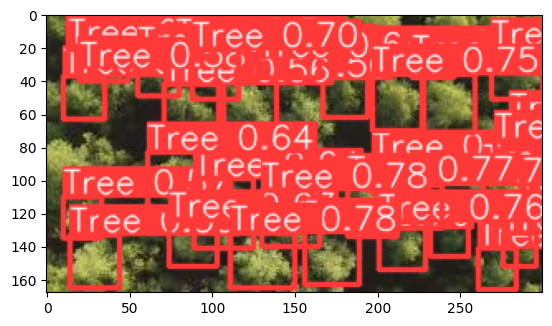

In [29]:
import matplotlib.pyplot as plt
from PIL import Image
image=Image.fromarray(results[0].plot()[:,:,::-1])
plt.imshow(image)

In [30]:
results = model("/kaggle/input/testimage")
results


image 1/1 /kaggle/input/testimage/test.jpeg: 640x608 7 Trees, 60.4ms
Speed: 2.6ms preprocess, 60.4ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 608)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Tree'}
 orig_img: array([[[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        ...,
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
         [255, 255, 255],
         [255, 255, 255]],
 
        [[255, 255, 255],
         [255, 255, 255],
         [255, 255, 255],
         ...,
         [255, 255, 255],
     

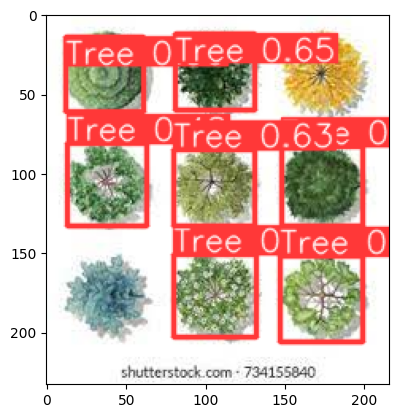

In [31]:
import matplotlib.pyplot as plt
from PIL import Image
image=Image.fromarray(results[0].plot()[:,:,::-1])
plt.imshow(image)

In [32]:
results=model("/kaggle/input/testimg1")
results


image 1/1 /kaggle/input/testimg1/test1.jpeg: 640x640 9 Trees, 8.5ms
Speed: 2.8ms preprocess, 8.5ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Tree'}
 orig_img: array([[[255, 255, 255],
         [255, 255, 255],
         [227, 227, 227],
         ...,
         [242, 242, 242],
         [190, 190, 190],
         [204, 204, 204]],
 
        [[253, 253, 253],
         [246, 246, 246],
         [223, 223, 223],
         ...,
         [240, 240, 240],
         [208, 208, 208],
         [200, 200, 200]],
 
        [[226, 226, 226],
         [222, 222, 222],
         [229, 229, 229],
         ...,
         [224, 224, 224],
         [246, 246, 246],
         [242, 242, 242]],
 
        ...,
 
        [[117, 117, 117],
         [116, 116, 116],
         [112, 112, 112],
         ...,
         [118, 118, 118],
         [119, 119, 119],
         [109, 109, 109]],
 
        [[118, 118, 118],
         [ 95,  95,  95],
         [113, 113, 113],
         ...,
         [ 99,  99,  99],
     

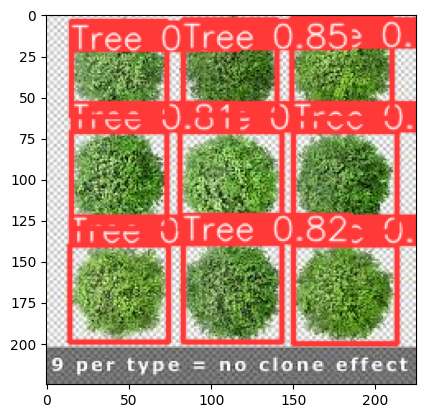

In [33]:
import matplotlib.pyplot as plt
from PIL import Image
image=Image.fromarray(results[0].plot()[:,:,::-1])
plt.imshow(image)

In [36]:
results=model("/kaggle/input/forest")
results


image 1/1 /kaggle/input/forest/forest.jpeg: 384x640 13 Trees, 11.7ms
Speed: 2.0ms preprocess, 11.7ms inference, 3.0ms postprocess per image at shape (1, 3, 384, 640)


[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'Tree'}
 orig_img: array([[[ 38,  99,  71],
         [ 21,  82,  54],
         [ 39, 100,  72],
         ...,
         [ 16,  71,  56],
         [ 16,  71,  56],
         [ 28,  85,  70]],
 
        [[ 35,  96,  68],
         [ 43, 104,  76],
         [ 41, 102,  74],
         ...,
         [ 22,  81,  66],
         [ 19,  78,  63],
         [ 28,  87,  72]],
 
        [[ 64, 125,  97],
         [ 54, 115,  87],
         [ 18,  82,  53],
         ...,
         [ 24,  92,  75],
         [ 16,  81,  65],
         [ 15,  80,  64]],
 
        ...,
 
        [[ 38, 134, 104],
         [ 33, 129,  99],
         [ 25, 118,  89],
         ...,
         [ 13,  61,  37],
         [  3,  49,  26],
         [ 23,  67,  44]],
 
        [[ 45, 138, 109],
         [ 34, 127,  98],
         [ 25, 117,  88],
         ...,
         [ 20,  68,  44],
     